## Predicting diabetes
<p>Below is a model built to predict diabetes using Logistic Regression Classifier.

The data used of Pima Indian Diabetes is available at: https://www.kaggle.com/uciml/pima-indians-diabetes-database</p>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[118,  12],
       [ 25,  37]], dtype=int64)

Accuracy: 0.8072916666666666
Precision: 0.7551020408163265
Recall: 0.5967741935483871


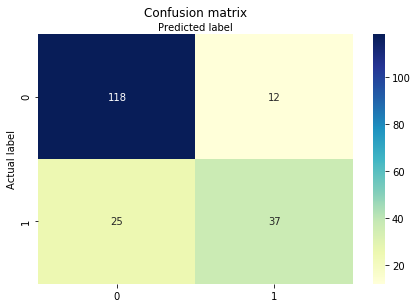

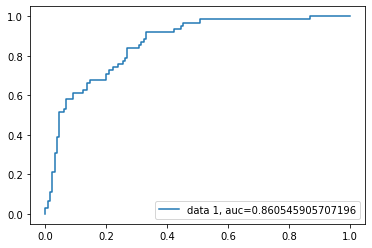

In [8]:
#import pandas
import pandas as pd

# load dataset
pima = pd.read_csv(r"C:\Users\pc\OneDrive\Coursera\Python\datacamp\Projects\Pima Indians Diabetes prediction\diabetes.csv", header=0)

display(pima.head())

# Selecting features: split dataset in features and target variable

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']


X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

# split X and y into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Model Development and Prediction

# importing
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')

# fit the model with the data
logreg.fit(X_train, y_train)

# make prediction
y_pred = logreg.predict(X_test)

# Model evaluation
# importing
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
display(cnf_matrix)

# Visualizing Conf.M. using Heatmap
# importing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Plotting the ROC curve

plt.figure()
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()